In [2]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
from src import ContactLens, Simulation, get_parameters, get_curing_time

In [3]:
model = ContactLens()

In [4]:
param = get_parameters()
param2 = get_parameters()
param2.update(
    {
        "Activation energy polimerisation [J.mol-1]": 0,
        "Polimerisation constant": 1.304 * np.exp(-17792 / (8.314 * 353.15)),
    }
)

parameters = [param, param2]

In [5]:
solutions = []
for param in parameters:
    sim = Simulation(model, parameter_values=param)
    t = np.linspace(0, 400, 1000)
    solution = sim.solve(t)
    solutions.append(solution)

In [6]:
pybamm.dynamic_plot(
    solutions,
    output_variables=[
        "Temperature [K]",
        "Degree of polimerisation",
        "Rate of polimerisation [s-1]",
        "Averaged temperature [K]",
        "Averaged degree of polimerisation",
        "Averaged rate of polimerisation [s-1]"
        # "UV intensity [W.m-2]",
    ],
    labels=[
        "temperature dependent",
        "isothermal",
    ]
)

interactive(children=(FloatSlider(value=0.0, description='t', max=400.0, step=4.0), Output()), _dom_classes=('…

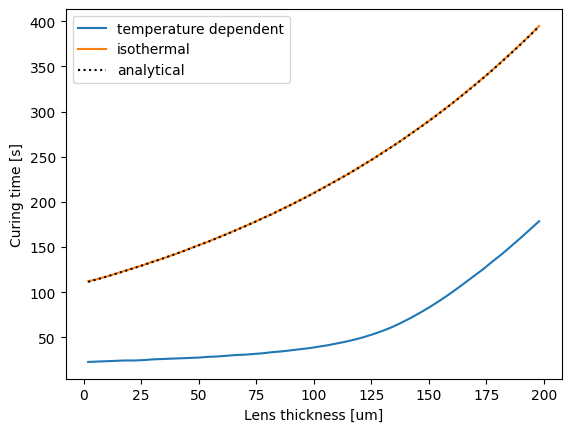

In [7]:
z = solution["z [um]"].entries[:, 0]
kI = param2["Radiation absorbance [m-1]"]
I0 = param2["UV boundary intensity [W.m-2]"]
q = param2["Polimerisation constant"]
for solution in solutions:
    t_c = get_curing_time(solution)
    plt.plot(z, t_c)
plt.plot(z, - np.log(1 - 0.95) / (I0 ** 0.5 * q) * np.exp(0.5 * kI * z * 1e-6), "k:")
plt.xlabel("Lens thickness [um]")
plt.ylabel("Curing time [s]")
plt.legend(["temperature dependent", "isothermal", "analytical"])
plt.savefig("curing_time.png", dpi=300)